In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv("/content/drive/MyDrive/data.csv.csv",error_bad_lines=False)

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [4]:
data

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [5]:
data['strength'].unique()

array([1, 2, 0])

- 0 - Weak Password
- 1 - Moderate Strength Password
- 2 - Great Password

In [6]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
# Dropping the null record
data.dropna(inplace=True)

In [8]:
# Again checking the null values
data.isna().sum()

password    0
strength    0
dtype: int64

<Axes: xlabel='strength', ylabel='count'>

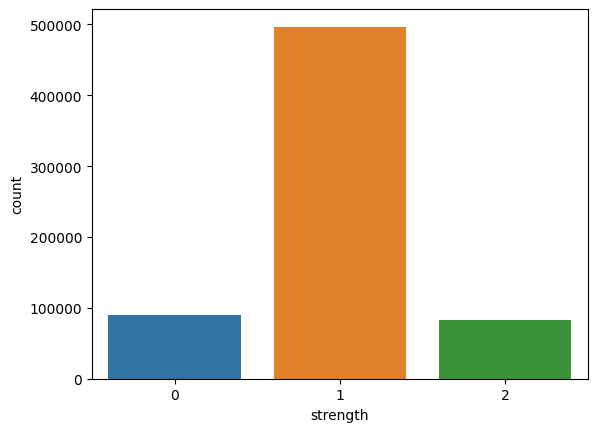

In [9]:
# Plotting the strength of password distribution
sns.countplot(x=data['strength'])

In [10]:
password_array = np.array(data)

In [11]:
password_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [12]:
import random
random.shuffle(password_array)

In [13]:
x = [labels[0] for labels in password_array]
y = [labels[1] for labels in password_array]

In [14]:
def word_divide(inputs):
    c = []
    for i in inputs:
        c.append(i)
    return c

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_divide)
X = vectorizer.fit_transform(x)

In [16]:
X.shape

(669639, 121)

In [17]:
vectorizer.get_feature_names_out()

array(['\x05', '\x06', '\x08', '\x10', '\x12', '\x16', '\x17', '\x19',
       '\x1b', '\x1c', '\x1e', ' ', '!', '"', '#', '$', '%', '&', '(',
       ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^',
       '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '¡', '¨',
       '«', '°', '±', '³', '´', 'µ', '·', 'º', '¼', '¾', '¿', '×', 'ß',
       'à', 'á', 'â', 'ä', 'å', 'æ', 'é', 'ê', 'í', 'î', 'ð', 'ñ', 'ò',
       'ó', 'ô', 'õ', 'ö', '÷', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', '—', '‚'],
      dtype=object)

In [18]:
first_document_vector = X[0]
first_document_vector

<1x121 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56656198],
        [0.        ],
        [0.5919695 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [20]:
# Creating a dataframe for TF-IDF
df = pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])

In [21]:
df

,TF-IDF
,0.0
,0.0
,0.0
,0.0
,0.0
...,...
ý,0.0
þ,0.0
ÿ,0.0
—,0.0


In [22]:
# Most used symbol or letter or character
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591970
5,0.566562
z,0.336557
k,0.291695
d,0.285466
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [23]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
X_train.shape,X_test.shape

((535711, 121), (133928, 121))

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,multi_class='multinomial')

In [26]:
classifier

LogisticRegression(multi_class='multinomial', random_state=0)

In [27]:
classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [28]:
#Predicting results using logistic regression
dt = np.array(['%@123abcd'])
pred = vectorizer.transform(dt)
classifier.predict(pred)

array([1])

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 1, ..., 1, 1, 0])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5330 12456    16]
 [ 3845 93223  2573]
 [   36  5046 11403]]


In [31]:
accuracy_score(y_test,y_pred)

0.8210083029687594

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     17802
           1       0.84      0.94      0.89     99641
           2       0.81      0.69      0.75     16485

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928



In [33]:
pip install dill


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.1 MB/s eta 0:00:00




```
# This is formatted as code
```

 Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [35]:
rf

RandomForestClassifier()

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


KeyboardInterrupt: ignored

In [ ]:
rf.fit(X_train,y_train)


In [ ]:
# Predicting the results using random forest
dt = np.array(['%@123abcd'])
pred = vectorizer.transform(dt)
rf.predict(pred)

In [ ]:
y_pred2 = rf.predict(X_test)
y_pred2

In [ ]:
cm = confusion_matrix(y_test,y_pred2)
print(cm)

In [ ]:
accuracy_score(y_test,y_pred2)

In [ ]:
print(classification_report(y_test,y_pred2))

# Checking password strength using Logistic Regression

In [37]:
import getpass
user = 'a1b2@c3d4e5'
data = vectorizer.transform([user]).toarray()
output = classifier.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")
# Password given is - a1b2@c3d4e5

Great Password


# Checking password strength using Random Forest

In [ ]:
import getpass
user = 'a1b2@c3d4e5'
data = vectorizer.transform([user]).toarray()
output = rf.predict(data)
if output==0:
    print("Weak Password")
elif output==1:
    print("Moderate strength Password")
else:
    print("Great Password")
# Password given is - a1b2@c3d4e5

We can see for the same password given 'a1b2@c3d4e5' we have 2 different results in logistic regression and random forest. It shows random Forest works well than Logistic regression as its accuracy also very high.